# Amazon kindle store Reviews

Description:

Amazon Kindle Store is an e-book e-commerce store for all the book reading hobbyists. Online reviews are a category of product information created by the users based on personal handling experience. Online shopping websites endow with platforms for consumers to review products and carve up opinions. Sentiment analysis or opinion mining is nothing but classification of emotions in the reviews text into positive, negative and neutral. Opinion mining is a method of information extraction from text processing to improve or develop the business work by review analysis. The problem is most of the comments from customer reviews about the products are contradicted to their ratings. Many customer will post their comments and forgot to rate the product or not engrossed to rate it. In this work we have designed a classifier model which accepts all the reviews and group them into two categories as reviews with ratings and reviews with blank or empty ratings. Further prediction of sentiments using various classifiers is done for the reviews without ratings.


In [1]:
import os
os.getcwd()

'C:\\Users\\gopia\\Desktop\\Gopi\\internship'

In [2]:
os.chdir(r"C:\Users\gopia\Desktop\Gopi\internship")


In [3]:
os.getcwd()

'C:\\Users\\gopia\\Desktop\\Gopi\\internship'

# Importing the libraries

In [4]:
import numpy as np #import numerical data
import pandas as pd #contains manipulate function
import matplotlib.pyplot as plt #matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.



# Importing the dataset 

The dataset is available in two forms

1.csv file

2.SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".



In [5]:
data1 = pd.read_csv('reviews_book1.csv') #the data in the csv file is stored in data1
data1

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200
...,...,...,...,...,...,...,...,...,...,...
14569,14569,B003ATPR4C,"[0, 0]",3,The book is very short and more pages are fill...,"08 28, 2013",A1XX88SJ23WEOY,"Lady Reader ""Marj""",More sex than story,1377648000
14570,14570,B003ATPR4C,"[0, 0]",5,Wonderful story can't wait for the next advent...,"08 6, 2013",A14ZDANVIG51R8,Leah Nelson,Wonderful story,1375747200
14571,14571,B003ATPR4C,"[0, 0]",5,Really enjoyed this short. Characters were we...,"03 27, 2013",A198SYM76YRZD9,LisaC,Fun short read!,1364342400
14572,14572,B003ATPR4C,"[2, 2]",5,"I really don't read paranormal books, this is ...","03 22, 2013",A3H7J5POTR9TZW,Liz,"Unleashed Temptation (Miami Scorcher, Book One)",1363910400


# Exploratory Data Analysis (EDA)

In [6]:
data1.groupby('overall')['summary'].describe()

,count,unique,top,freq
overall,,,,
1,645,613,Boring,7
2,862,822,Disappointed,5
3,2054,1866,Good,15
4,4332,3712,Good,40
5,6681,5502,Loved it,35


In [7]:
data1.groupby('overall').overall.count()

overall
1     645
2     862
3    2054
4    4332
5    6681
Name: overall, dtype: int64

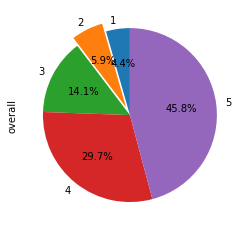

In [8]:
%matplotlib inline
data1.groupby('overall').overall.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [9]:
df=data1
df=df[['summary','overall']]
df=df[df['overall']!=3]
df=df.reset_index(drop=True)
df['sentiment']=np.where(df['overall'] > 3, 1, 0)
df

,summary,overall,sentiment
0,Nice vintage story,5,1
1,Different...,4,1
2,Oldie,4,1
3,I really liked it.,5,1
4,Period Mystery,4,1
...,...,...,...
12515,Beautiful!,5,1
12516,Wonderful story,5,1
12517,Fun short read!,5,1
12518,"Unleashed Temptation (Miami Scorcher, Book One)",5,1


# Text Cleaning or Pre-processing 

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.
1.Begin by removing the html tags

2.Remove any punctuations or limited set of special characters like , or . or # etc.

3.Check if the word is made up of english letters and is not alpha-numeric

4.Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

4.Convert the word to lowercase

6.Remove Stopwords


Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)


In [10]:
# Import libraries
import re  #“Re” is the library which is used to replace the selected special characters with desired parameter.
import nltk #“NLTK” – Natural language Tool Kit is the library used for stemming using a special class in the library. 

# import library for remove Stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

# import library for stemming

In [13]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
data=[]

# Remove Punctuation,Numbers
# Convert each word into its lower case
# Stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. To stem each word first we have to split the review in to a list and then apply stemming functionality. we use port stemmer class for stemming purpose. We are also removing stop words like “this”, “that”, “and”, “is”, “what” etc. The syntax checks all the words in the list which is split, if the word is not a stop word then you are applying stemming to stem the selected word” 

In [14]:
for i in range(0,1000):
    review = data1["summary"][i]
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [15]:
data[:10]

['nice vintag stori',
 'differ',
 'oldi',
 'realli like',
 'period mysteri',
 'review',
 'nice old fashion stori',
 'enjoy read remind old time',
 'darth maul',
 'bad except']

# split the data set into train and test

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500,min_df=5,ngram_range=(1,2))

In [18]:
X = cv.fit_transform(df["summary"].apply(lambda x: np.str_(x))) 
y=df.iloc[:,2].values
y.shape
y=y.reshape(-1,1)

In [19]:
X

<12520x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 47180 stored elements in Compressed Sparse Row format>

In [20]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [21]:
import pickle
pickle.dump(cv, open("cv.pkl", "wb"))

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [24]:
X_train


<10016x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 37840 stored elements in Compressed Sparse Row format>

In [25]:
X_test

<2504x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 9340 stored elements in Compressed Sparse Row format>

In [26]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [27]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

# Model Building

After splitting your data into train and test in pre-processing steps then you should implement ANN algorithm The steps are as follows  
 Importing the libraries 

 Initializing the model 

 Adding input layer

 Adding Hidden 

 Adding output layer

 Configuring the learning process  

 Training the model

 Saving the model

 Predictions 

 

# Importing the libraries

In [28]:
pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install tensorflow==1.14

  Using cached tensorflow-1.14.0-cp37-cp37m-win_amd64.whl (68.3 MB)
  Using cached tensorflow_estimator-1.14.0-py2.py3-none-any.whl (488 kB)
  Using cached tensorboard-1.14.0-py3-none-any.whl (3.1 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0
Note: you may need to restart the kernel to use updated packages.


# import librart which usess tensor flow as backend

In [29]:
import keras

Using TensorFlow backend.
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gopia\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Library to intialise the model

In [30]:
from keras.models import Sequential

Library Used to add the model

In [31]:
from keras.layers import Dense

# Initializing the model 

Model initialization is the process of determining the necessary model parameters such as the basic value, the trend value, and the seasonal indices for the selected forecast model. It is necessary when you use a model that forecasts a value for one period based on the forecast value for the period directly before it.


In [32]:
model = Sequential()

# Adding Input Layer 

This step is to add a dense layer (input layer) where you will be specifying the number of inputs to the neural network, activation function and weights initializer and number of connection to the hidden layer as the arguments. We use add() method to add dense layers 
 

In [33]:
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 1500))

C:\Users\gopia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1500, units=8, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Adding Hidden Layer 

This step is to add a dense layer (Hidden layer) where you will be specifying the number neurons to the next layer, activation function and weight initializer as the arguments. We use add() method to add dense layers. In this layer no need of mentioning input dimensions as we have mentions them in the above layer itself 
 
 

In [34]:
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

C:\Users\gopia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Adding an Output Layer 

This step is to add a dense layer (output layer) where you will be specifying the number of classes your dependent variable has, activation function and weight initializer as the arguments. We use add () method to add dense layers. In this layer no need of mentioning input dimensions as we have mentions them in the above layer itself

In [35]:
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\gopia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


# Configuring the learning process 

With both the training data defined and model defined, it's time configure the learning process. This is accomplished with a call to the compile() method of the Sequential model class. Compilation requires 3 arguments: an optimizer, a loss function, and a list of metrics. 

In [38]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model 

At this point we have training data and a fully configured neural network to train with said data. All that is left is to pass the data to the model for the training process to commence, a process which is completed by iterating on the training data. Training begins by calling the fit() method. The arguments are batch size as you are using “adam” (bath gradient descent and epochs: no: of times the model should get trained 
 

In [39]:
model.fit(X_train,y_train,batch_size=32,epochs=10)


Epoch 1/10
10016/10016 [==============================] - 1s 50us/step - loss: 0.4429 - accuracy: 0.8776
Epoch 2/10
10016/10016 [==============================] - 0s 40us/step - loss: 0.2729 - accuracy: 0.8780
Epoch 3/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.2298 - accuracy: 0.8780
Epoch 4/10
10016/10016 [==============================] - 0s 41us/step - loss: 0.2064 - accuracy: 0.8970
Epoch 5/10
10016/10016 [==============================] - 0s 41us/step - loss: 0.1937 - accuracy: 0.9275
Epoch 6/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.1841 - accuracy: 0.9340
Epoch 7/10
10016/10016 [==============================] - 0s 47us/step - loss: 0.1765 - accuracy: 0.9353
Epoch 8/10
10016/10016 [==============================] - 0s 38us/step - loss: 0.1706 - accuracy: 0.9390
Epoch 9/10
10016/10016 [==============================] - 0s 41us/step - loss: 0.1647 - accuracy: 0.9395
Epoch 10/10
10016/10016 [=============================

# Save The Model: 

Your model is to be saved for the future purpose. This saved model ac also be integrated with android application or web application in order to predict something 
 
 

In [40]:
model.save('mymodel.h5')

# Prediction: 

The last and final step is to make use of Saved model to do predictions. We use load model class to load the model 


.

In [ ]:
from keras.models import load_model
from flask import Flask,request,jsonify,render_template
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow as tf


#graph = tf.get_default_graph()
#cv = pickle.load(open('cv.pkl', 'rb'))


#model=load_model('model.h5')
app=Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')
@app.route('/y_predict',methods=['POST'])
def y_predict():
    """
        For rendering results on HTML GUI
    """
    #model.predict(cv.transform(['I\'m So Happy']))
    #x_test=[request.form['Sentence']]
    #print(x_test)
    #return render_template('index.html',prediction_text=x_test)
    #x_test = cv.transform([request.form['Sentence']])
    #return render_template('index.html',prediction_text=str(x_test))
    with open('cv.pkl','rb') as file:
        cv=pickle.load(file)    
        model=load_model('mymodel.h5')
        prediction = model.predict(cv.transform([request.form['Sentence']]))
        output=prediction[0]
        if(output>0.5):
            return render_template('index.html',prediction_text="Good Review"+str(output))
        else:
            return render_template('index.html',prediction_text="Negative Review"+str(output))
if(__name__=="__main__"):
    app.run(debug=True)

# HTML

In [ ]:
<!DOCTYPE html>
<html >
<!--From https://codepen.io/frytyler/pen/EGdtg-->
<head>
  <meta charset="UTF-8">
  <title> Amazon kindle analysis by Gopi</title>
  <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">

<style>
.login{
top: 20%;
}
</style>
</head>

<body align="center" background="C:\Users\gopia\Desktop\Gopi\internship\image1.jpg">
 <div class="login">
	<h1> Analysis of Amazon kindle Reviews </h1>

     <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('y_predict')}}"method="post">
    	<input type="text" name="Sentence" placeholder="Enter your review" required="required" />

        <button type="submit" class="btn btn-primary btn-block btn-large">Analyze</button>
    
    </form>

   <br>
   <br>
   {{ prediction_text }}

 </div>


</body>
</html>
